<a href="https://colab.research.google.com/github/DrYGuo/Defect-detection-in-atomic-resolution-image-via-unsupervised-learning-with-translational-invariance/blob/main/Copy_of_STEM_of_2H_MoWTe2_for_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code is to process the STEM data of 2H MoWTe2.

Mount the shared drives 'TMD_NIST'

> Then, run the following things



# 1.Install dependencies

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# import dm3_lib
import skimage.feature
from matplotlib.patches import Circle
import matplotlib.colors
import scipy.ndimage
#from numba import jit
from collections import namedtuple
!pip install scikit-image
import json

# 2.Load the data from Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! ls /content/drive/Shared\ drives/

TMD_NIST


In [ ]:
path='/content/drive/Shared drives/TMD_NIST/data/2H MoWTe2 x=0.09/100_frames_high_Mag.ndata1'

In [ ]:
data_zipped=np.load(path)
data=data_zipped['data']
fig,ax = plt.subplots(1,figsize=(12,12))
ax.imshow(data[0],cmap='Greys_r')
plt.tight_layout()
plt.show()

OSError: ignored

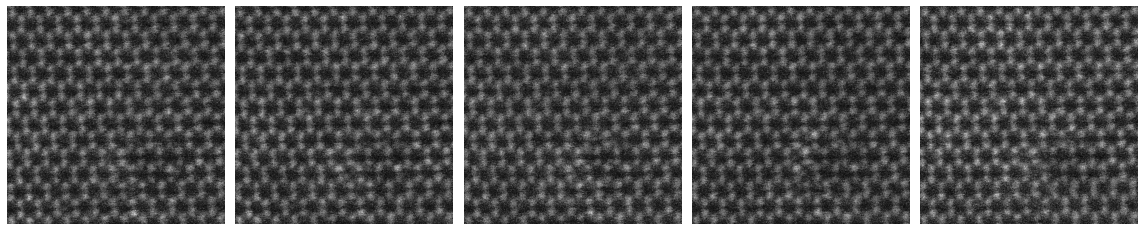

In [ ]:
# Preview the first few frames
num_disp = 5
fig,ax = plt.subplots(1,num_disp,figsize=(16,8))
for n in range(num_disp):
    ax[n].imshow(data[n,:,:],cmap='Greys_r')
    ax[n].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(data_zipped.files)

['metadata.json', 'data']


Grab the "scale" from "spatial_calibrations" in the metadata

In [ ]:
metadata=data_zipped['metadata.json']
print(metadata)
scalebar=json.loads(metadata)["spatial_calibrations"][1]['scale']
print('scale='+str(scalebar)+'nm/pix')

b'{"version": 1, "reader_version": 1, "spatial_calibrations": [{"offset": 0.0, "scale": 1.0, "units": ""}, {"offset": -2.0, "scale": 0.0078125, "units": "nm"}, {"offset": -2.0, "scale": 0.0078125, "units": "nm"}], "intensity_calibration": {"offset": 0.0, "scale": 1.0, "units": ""}, "is_sequence": true, "collection_dimension_count": 0, "datum_dimension_count": 2, "metadata": {"hardware_source": {"ImageScanned:C1 ConstW": 0.374, "ImageScanned:C10": 2.01903e-09, "ImageScanned:C12.a": 5.02991e-09, "ImageScanned:C12.b": -6.28254e-10, "ImageScanned:C21.a": -1.14478e-07, "ImageScanned:C21.b": -3.04613e-08, "ImageScanned:C23.a": 2.4295e-09, "ImageScanned:C23.b": -1.73943e-08, "ImageScanned:C30": -8.13558e-06, "ImageScanned:C32.a": -6.06129e-06, "ImageScanned:C32.b": 5.61327e-07, "ImageScanned:C34.a": 1.42443e-07, "ImageScanned:C34.b": -9.45683e-07, "ImageScanned:C41.a": 0.000300423, "ImageScanned:C41.b": 7.99391e-05, "ImageScanned:C43.a": -9.56357e-06, "ImageScanned:C43.b": 6.84714e-05, "Image

In [ ]:
metadata_dict=json.loads(metadata)

In [ ]:
PMTDF_gain=json.loads(metadata)["metadata"]['hardware_source']['ImageScanned:PMTDF_gain']
print(PMTDF_gain)

67108900.0


In [ ]:
hardware_source=metadata_dict[]['hardware_source']

SyntaxError: ignored

In [ ]:
autostem=metadata_dict["metadata"]['autostem']

In [ ]:
metadata_dict["metadata"]

In [ ]:
#d = {'abc':'abc','def':{'ghikey':'ghival','jklkey':'jklval'}}
for ele in metadata_dict.values():
    if isinstance(ele,dict):
       for k, v in ele.items():
           print(k,'=',v)

In [ ]:
for ele in hardware_source.values():
    if isinstance(ele,dict):
       for k, v in ele.items():
           print(k,'=',v)

In [ ]:
for ele in autostem.values():
    if isinstance(ele,dict):
       for k, v in ele.items():
           print(k,'=',v)

In [ ]:
json.loads(metadata)

In [ ]:
json.loads(metadata)["metadata"]['hardware_source']

In [ ]:
information=json.loads(metadata)["metadata"]['hardware_source']['autostem']
print(information)

In [ ]:
json.loads(metadata)[]

##**Add scale bar to the image**

In [ ]:
ADFscale=scalebar

In [ ]:
sb = 2# nm
scalebar = sb / ADFscale

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [ ]:
# %matplotlib inline
fsx,fsy = 10,10

f,a = plt.subplots(figsize=(fsx,fsy))
gs = gridspec.GridSpec(1, 1, hspace = 0.1, wspace= 0.1)
ax1 = plt.subplot(gs[0, 0])


ax1.imshow(data[0], cmap = 'gray')

scalebar1 = patches.Rectangle((0.03*data[0].shape[1],0.92*data[0].shape[0]), scalebar, 0.5, linewidth=3,edgecolor='white', facecolor = 'white')
ax1.add_patch(scalebar1);
sbpos = scalebar1.get_bbox().get_points()
sbcenter = (sbpos[1][0]-sbpos[0][0])/2 + sbpos[0][0]  # for whatever reason it doesn't come out quite at the center, hence the 2.3 factor instead of just 2
ax1.text(sbcenter, 1.05*sbpos[1][1], '${}$ $nm$'.format(sb), fontsize = 20, weight = 'bold', color = 'white', ha = 'center')
plt.setp([ax1], xticks = [], yticks = []);
plt.savefig('MoWTe2',dpi=300,pad_inches=0.0)

In [ ]:
plt.hist(data[0],bins=100)

#3.Loading datasets from local drive (Alternative option)

load from local drives

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [ ]:
# filename = fn
# infile = np.load(filename)
# print(infile.files)
# data = infile['data']
# bigfile = np.load(filename)
# bigd = bigfile['data']

load sequences

In [ ]:
# # Preview the first few frames
# num_disp = 1
# fig,ax = plt.subplots(1,num_disp,figsize=(16,8))
# for n in range(num_disp):
#     ax[n].imshow(data[n,:,:],cmap='Greys_r')
#     ax[n].axis('off')

# plt.tight_layout()
# plt.show()


# 4.Try the easiest way of locating the atoms by finding local maxima



In [ ]:
plt.set_cmap('Greys_r')

NameError: ignored

In [ ]:
import scipy

img_data=data

YG_data=scipy.ndimage.gaussian_filter(img_data,sigma=3)

def normalize_image(image):
    """
    Normalizes the provided image from 0 to 1

    Parameters
    ----------
    image : np.array object
        Image to be normalized

    Returns
    -------
    image : np.array object
        Image normalized from 0 to 1
    """
    return (image - np.amin(image)) / (np.amax(image) - np.amin(image))

YG_data_norm=normalize_image(YG_data)
# plt.imshow(YG_data)
# plt.colorbar()


data2 = YG_data_norm

from skimage.feature import peak_local_max
xy2= peak_local_max(data2, min_distance=1,threshold_abs=0.3)
array1,array2=np.hsplit(xy2,2)
plt.scatter(array2,array1,s=0.05,c='red')
plt.imshow(YG_data_norm)
plt.colorbar()
print(xy2.shape)

I didn't attempt ot classify the chemical categories. 

In [ ]:
xy2= peak_local_max(data2, min_distance=1,threshold_abs=0.3)
num_of_columns=peak_local_max(data2, min_distance=1,threshold_abs=0.3).shape[0]
array1,array2=np.hsplit(xy2,2)
plt.scatter(array2,array1,s=0.05,c='red')
plt.imshow(YG_data_norm)
plt.colorbar()
print(xy2.shape)

1. histogram
  look at the neighbours local coordinates
2. beam current in pico A
3. how many counts per electron @100kV less counts per electrons? how many counts per pico A
4. 


In [ ]:
xy2= peak_local_max(data2, min_distance=1,threshold_abs=0.7)
num_of_bright_columns=peak_local_max(data2, min_distance=1,threshold_abs=0.7).shape[0]
array1,array2=np.hsplit(xy2,2)
plt.scatter(array2,array1,s=0.03,c='r')
plt.imshow(YG_data_norm)
plt.colorbar()
print(xy2.shape)
print(num_of_bright_columns)

The ratio of bright columns/total number of columns

In [ ]:
num_of_bright_columns/num_of_columns

In [ ]:
hist=np.histogram(data2)

print(hist[0])
print(hist[1])

Aha, I didn't expect this to be so consistent with the concentration!

I need to justify the choice of those threshold values(actually they are already clear even by looking at them)

In [ ]:
#!pip install atomai

In [ ]:
'''import atomai as aoi
import numpy as np'''

# 5.Use Graphene Atom Finder
https://colab.research.google.com/github/ziatdinovmax/AICrystallographer/blob/master/AtomNet/GrapheneAtomFinder.ipynb

## Import modules and load model

If running a notebook in Google Colab (which is a recommended way of working with this notebook), run the cell below to clone the repository with AtomNet and copy the AtomNet modules and data to the root folder:

In [ ]:
nbtype = !python -c "import google.colab" 2>/dev/null; echo $?
if not int(nbtype[0]):
    !git clone https://github.com/pycroscopy/AICrystallographer.git
    !cp -r AICrystallographer/AtomNet/* .

Import modules:

In [ ]:
import glob
import dcnn
from atomfind import *
from utils import open_hdf
import matplotlib.pyplot as plt

%matplotlib inline

## single class atom finding

Load a trained pytorch model:

In [ ]:
# specify system type (currently available: graphene, graphene-si, cubic)
system_type='graphene'
# load model
model = dcnn.load_torchmodel(system_type)

In [ ]:
imgdata=YG_data_norm

In [ ]:
# Make a prediction using a loaded DL model
img, dec = dl_image(imgdata, model).decode()
# Exract atomic coordinates from the neural network output
coord = find_atoms(dec).get_all_coordinates()

In [ ]:
print(coord[0])

Plot the image and the coordinates

In [ ]:
# Plot results
fig, ax = plt.subplots(1, 3, figsize=(64,30 ))
ax[0].imshow(img[0, :, :, 0], cmap='gray')
ax[0].set_title('Experimental image. Resolution '+str(img.shape[1])+'x'+str(img.shape[2]))
ax[1].imshow(dec[0, :, :, 0], cmap='jet', Interpolation ='Gaussian')
ax[1].set_title('Model prediction. Resolution '+str(dec.shape[1])+'x'+str(dec.shape[2]))
ax[2].imshow(img[0, :, :, 0], cmap='gray')
ax[2].scatter(coord[0][:, 1], coord[0][:, 0], s=1, c='red')
ax[2].set_title('Atomic coordinates')
for _ax in fig.axes:
     _ax.grid(alpha=0.3)
plt.show()

# Sergei's Instructions

SVK: Consider the action plan where:
- you find all the atoms using single class
- define atomic neighbourhood (sub-image) centered on each atom, and including 2 nearest neighbours
- do simple classification, e.g. using the GMM model, and visualize the groups in the PCA space
- you should have two well-defined clusters corresponding to the the sublattices, and a lot of atoms everywhere corresponding to defects, etc.
- as a hint - when you visualize clusters in PCA space, it is very convenient to superimpose both points and the KDE plot on top of it (since otherwise you see outliers and it is difficult to judge where the probability density is concentrated)
- with the well-defined groups, you can draw classes for training from the centroids of GMM, and in fact construct your training set using samples drawn from within GMM clusters
- and then retrain the network. Or you can even use clusters as labels and see if it separates sublattices and defects at the first iteration
- I have added code snippets that can do GMM (in my case in latent space of rVAE, but can be done from PCA space as well), and plot things. Let me know if it works

In [ ]:
'''
# This code can be used to plot both the points and the KDEs. 
# Needs data as pd frame and Seaborne

x = cols['Latent 1']
y = cols['Latent 2']

plt.figure(num = 5, figsize=(5,4), dpi = 100)
ax = sns.regplot(x, y, fit_reg = False, scatter_kws={"s": 5})
ax = sns.kdeplot(x, y, cmap="Reds", shade=True, shade_lowest=False, cut = 0, alpha = 0.6, cbar = True)
ax.set_xlabel(xlabel = ax.get_xlabel(), fontdict={'fontsize' : 12})
ax.set_ylabel(ylabel = ax.get_ylabel(), fontdict={'fontsize' : 12})
ax.set_xticklabels(np.round(ax.get_xticks(), decimals=2), size = 12)
ax.set_yticklabels(np.round(ax.get_yticks(), decimals=2), size = 12)
ax.figure.axes[-1].yaxis.label.set_size(4)
plt.show()
'''

In [ ]:
'''
# This is GMM code
# And k-means code

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Important ot play with covariance
gmmp = GaussianMixture(n_components=3, covariance_type='full') #diag
gmm_zp = gmmp.fit_predict(z3)

k_means = KMeans(n_clusters=4)
k_means.fit(z3)
centers = k_means.cluster_centers_
labels = k_means.labels_

plt.figure(figsize=(6,6))
plt.scatter(z3[:, 0], z3[:,1], c=gmm_zp, cmap="jet")
plt.xlabel("Latent 1", fontsize = 18)
plt.ylabel("Latent 2", fontsize = 18)
plt.tick_params(labelsize = 18)
'''

In [ ]:
'''
# Example of getting images corresponding to GMM clusters

z = z3
nc = 3 #Try 4, 8, 16, 32
stack_mean = stack[:, :,:, 0].mean(axis = 0)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=nc, covariance_type='full')
gmm_z = gmm.fit(z)

rows = int(np.ceil(float(nc)/4))
cols = int(np.ceil(float(nc)/rows))

gs2 = gridspec.GridSpec(rows, cols)
fig2 = plt.figure(figsize = (4*cols, 4*(1+rows//1.5)))   
for i in range(nc):
    ax2 = fig2.add_subplot(gs2[i])
    ax2.imshow(stack[gmm_zp == i, :,:, 0].mean(axis = 0) - 0*stack_mean, cmap = 'jet')
    ax2.set_title('Component ' + str(i + 1))
    plt.tick_params(labelsize = 18)
'''

In [ ]:
'''
#Here we can color-code the experimental image/frame based on the latent variable values

gmm_zt = gmm.fit_predict(z)

frame = 0 # select frame

com_i = com_all[np.where(frames_all == frame)] # get coordinates for this frame
gmm_zt_i = gmm_zt[np.where(frames_all == frame)] # get latent variables for this frame

plt.figure(figsize=(12, 12))
plt.imshow(imgdata[frame], cmap="gray")
plt.scatter(com_i[:, 1], com_i[:, 0], c=gmm_zt_i, cmap = 'jet')
plt.colorbar()
plt.show()
'''

# define atomic neighbourhood (sub-image) centered on each atom, and including 2 nearest neighbours

In [ ]:
a_MoTe2=0.353 # nm
a_length=a_MoTe2/0.015625

print(a_length)

In [ ]:
'''
coord[0].shape
num_subimages=coord[0].shape[0]
print(num_subimages)
'''
size_subimages=41 # should be larger than 
print(size_subimages)
'''
#collection=np.zeros((num_subimages,size_subimages,size_subimages))
print(collection.shape)
'''

In [ ]:
coord[0][0]

Create a collection of subimages

In [ ]:
collection=np.zeros((size_subimages,size_subimages,1))
coord_collection=np.zeros((1,2))
for i in np.arange(np.shape(coord[0])[0]):
   y1=int(coord[0][i,0]-size_subimages/2)
   y2=y1+size_subimages
   x1=int(coord[0][i,1]-size_subimages/2)
   x2=x1+size_subimages
   if y1>=0 and y1<=1023 and y2>=0 and y2<=1023 and x1>=0 and x1<=1023 and x2>=0 and x2<=1023:
         subimage_i=YG_data_norm[y1:y2,x1:x2]
         collection=np.append(collection, np.atleast_3d(subimage_i), axis=2)
         row=coord[0][i][0]
         col=coord[0][i][1]
         coord_collection=np.vstack([coord_collection,[row,col]])
         

In [ ]:
new_collection=np.delete(collection, 0, axis=2)
new_coord_collection=np.delete(coord_collection,0,axis=0)

In [ ]:
print(collection.shape)
print(coord_collection.shape)

In [ ]:
print(new_collection.shape)
print(new_coord_collection.shape)

In [ ]:
print(new_coord_collection[0,:])

In [ ]:
plt.imshow(new_collection[:,:,11])

In [ ]:
plt.imshow(collection[:,:,1])

What do you want to explore with the FFT?

FOr creatign sub-images, use Maksim subimage stack generation function. You can easily write your own parser, but it is better to follow AtomAI

SVK: Excellent. In principle, there is no harde recipies about how to mask sub-images (we tried different ways, but not exactly systematic yet). SO you cam
- add an option of multiplying it by a suitable mask (something like Gaussian, or cos^2 r for r<Rcrit and 0 outside
- and then do GMM on sub-image stacks, check GMM classes, and return the class labels to "paint" main image (i.e. it will tell you what class does atom belong to)
- down the line, you use same approach to "paint" via VAE or rVAE latent variables

Apply a mask to mask out the non-nearest neighbor atoms



Try a circle mask

In [ ]:
import math
math.floor(2.9)
math.ceil(2.15)
math.floor(5/2)

In [ ]:
img=new_collection[:,:,11]
h,w=img.shape
y_center=math.floor(h/2)
x_center=math.floor(w/2)
mask=np.zeros((h,w))

r_crit=math.floor(h/2)


for i in np.arange(w):
   for j in np.arange(h):
     if (i-x_center)**2 + (j-y_center)**2 <=r_crit**2:
        mask[i,j]=1

plt.imshow(mask)
plt.colorbar()

In [ ]:
img=new_collection[:,:,100]
plt.imshow(img*mask)
plt.colorbar()

In [ ]:
row,col,num=new_collection.shape
data_stack=np.zeros((row,col,num))

for i in np.arange(num):
   data_stack[:,:,i]=new_collection[:,:,i]*mask

plt.imshow(data_stack[:,:,2])
   

In [ ]:
z3=data_stack.transpose(2,0,1).reshape(num,-1)
print(z3.shape)

In [ ]:
# This is GMM code
# And k-means code

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


# Important ot play with covariance
gmmp = GaussianMixture(n_components=2,max_iter=100,covariance_type='full') #diag,'full', ‘tied’, ‘diag’, ‘spherical’
gmm_zp = gmmp.fit_predict(z3) # predicting the labels for each vector
clf=gmmp.fit(z3)  # fit to mixture of multi-variate Gaussians and optimize the mean,covariance matrices and the mixture coefficients

'''
k_means = KMeans(n_clusters=4)
k_means.fit(z3)
centers = k_means.cluster_centers_


plt.figure(figsize=(6,6))
plt.scatter(new_coord_collection[:, 0], new_coord_collection[:,1], c=gmm_zp, cmap="jet")
plt.imshow(YG_data_norm,cmap='gray')
plt.xlabel("Latent 1", fontsize = 18)
plt.ylabel("Latent 2", fontsize = 18)
plt.tick_params(labelsize = 18)
'''

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

def GMM(n,z3):
    gmmp = GaussianMixture(n_components=n,max_iter=100,covariance_type='full') #diag,'full', ‘tied’, ‘diag’, ‘spherical’
    gmm_zp = gmmp.fit_predict(z3) # predicting the labels for each vector
    clf=gmmp.fit(z3)
    return clf, gmm_zp

In [ ]:
'''
#plot results for configurations
for n in [2,3,4,5]:
    clf,gmm_zp=GMM(n,z3)
    fig,ax=plt.subplots(1,n,figsize=(10,5))
    for i in np.arange(n):
       ax[i].imshow(clf.means_[i,:].reshape(row,col), cmap='gray')
       ax[i].set_title('the mean vector #'+str(i))

'''

In [ ]:
'''
#plot results for configurations
for n in [6,7,8,9]:
    clf,gmm_zp=GMM(n,z3)
    fig,ax=plt.subplots(1,n,figsize=(20,10))
    for i in np.arange(n):
       ax[i].imshow(clf.means_[i,:].reshape(row,col), cmap='gray')
       ax[i].set_title('the mean vector #'+str(i))

'''


In [ ]:
'''
#@title
# plot results for configurations

for n in [2,3,4,5]:
   fig, ax = plt.subplots(1,n, figsize=(10,5))
   for i in np.arange(n):
      ax[i].imshow(means[n-2,i], cmap='gray')
      ax[i].set_title('the mean vector'+str(i))
'''

In [ ]:
'''
# plot results for labels in the original image
fig, ax = plt.subplots(1,4, figsize=(10,5))

for n in [2,3,4,5]:
    ax[n-2].scatter(new_coord_collection[:, 1], new_coord_collection[:,0], c=gmm_zp, cmap="jet",s=10)
    ax[n-2].
plt.scatter(new_coord_collection[:, 1], new_coord_collection[:,0], c=gmm_zp, cmap="jet",s=10)
plt.imshow(YG_data_norm,cmap='gray')
plt.tick_params(labelsize = 18)
'''

In [ ]:
clf.means_.shape

In [ ]:
xpdf = np.linspace(-5, 5, 21)
print(xpdf)

In [ ]:
z3.shape

In [ ]:
clf.score(z3)

In [ ]:
means_0=clf.means_[0,:].reshape(row,col)
means_1=clf.means_[1,:].reshape(row,col)

fig, ax = plt.subplots(1, 2, figsize=(10,15))
ax[0].imshow(means_0, cmap='gray')
ax[0].set_title('the mean vector #0')
ax[1].imshow(means_1,cmap='gray')
ax[1].set_title('the mean vector #1')

In [ ]:
clf.covariances_

In [ ]:
print(clf.covariances_.shape)
np.linalg.det(clf.covariances_[1])

In [ ]:
clf.weights_

Bayesian Inference criterion

In [ ]:
clf.bic(z3)

In [ ]:
gmm_zp.shape

Plot the result in real space 

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(new_coord_collection[:, 1], new_coord_collection[:,0], c=gmm_zp, cmap="jet",s=10)
plt.imshow(YG_data_norm,cmap='gray')
plt.tick_params(labelsize = 18)

### **Interestingly, the missing atoms are always 'BLUE'** 




June 23, SVK: Fantastic! Now you can do several things:
- first, you need ot plot the GMM classes to see how they look like. These are basically elementary building blocks of solid 
- secondly, you can experiment what is going to happen if you try to separate in 2,3,4, ... classes and see how the class representations and labeled images will change. You should start to separate main sublattices and defects at some point
- you can plot the GMM groups in PCA space (here, PCA is done on all subimages; each subimage vbecomes a PCA vector, and you use GMM group as label)
- within the class, you can play with PCA on the single- class sub-images, which will give you deformation modes.  

THis constitutes AtomAI->GMM->PCA workflow that works very well when the lattice is almost perfect. 

Two more comments:
- what is th evolume of this data (single image or stack with evolution)?
- nice touch with the scale bar. You may want to share this snippet with everybody:)

Second thing - Maksim AtomAI has all these done as automated fucntions. It may be a very good idea to learn how to do it manually first (because otherwise it is incomprehensible), and thne do it by AtomAI since it is convenient.

[How many Gaussians should we use? Given a model, we can use one of several means to evaluate how well it fits the data. For example, there is the Aikaki Information Criterion (AIC) and the Bayesian Information Criterion (BIC)](https://github.com/jakevdp/ESAC-stats-2014/blob/master/notebooks/05.3-Density-GMM.ipynb)

In [ ]:
'''
n_estimators = np.arange(1, 10)

clfs = [GaussianMixture(n, max_iter=100).fit(z3) for n in n_estimators]
bics = [clf.bic(z3) for clf in clfs]
aics = [clf.aic(z3) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();
'''

PCA

In [ ]:
def PCA(z3,NC):
    from sklearn.decomposition import PCA,KernelPCA
    pca=PCA(n_components=NC,whiten=True)
    pca.fit(z3)
    
    explained_var = pca.explained_variance_ratio_
    
    X_vec_t = pca.fit_transform(z3)

    components = pca.components_

    return components,X_vec_t,explained_var

In [ ]:
components,X_vec_t,explained_var=PCA(z3,NC=10)
print(np.sum(explained_var))

In [ ]:
plt.set_cmap('jet')
plt.scatter(gmm_zp,gmm_zp,c=gmm_zp)
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(new_coord_collection[:, 1], new_coord_collection[:,0], c=gmm_zp, cmap="jet",s=10)
plt.imshow(YG_data_norm,cmap='gray')
plt.tick_params(labelsize = 18)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].scatter(X_vec_t[:,0], X_vec_t[:,1],s=0.5,c=gmm_zp)
ax[0].set_xlabel('component 0')
ax[0].set_ylabel('component 1')

ax[1].scatter(X_vec_t[:,0], X_vec_t[:,2],s=0.5,c=gmm_zp)
ax[1].set_xlabel('component 0')
ax[1].set_ylabel('component 2')

ax[2].scatter(X_vec_t[:,1], X_vec_t[:,2],s=0.5,c=gmm_zp)
ax[2].set_xlabel('component 1')
ax[2].set_ylabel('component 2')
plt.tight_layout()


Outlier detection by log_likelihood

In [ ]:
#weighted log probabilities

log_likelihood = clf.score_samples(z3).reshape(-1,1)
plt.plot(log_likelihood)
print(log_likelihood.shape)
plt.title('log_likelihood of each subimage')

In [ ]:
#print(log_likelihood.reshape(-1,1).shape)

In [ ]:
detected_outliers = np.where(log_likelihood <= 9550)[0]
print(detected_outliers)

In [ ]:
plt.imshow(data_stack[:,:,detected_outliers[1]],cmap='gray')

In [ ]:
# 10 first outliers
fig,ax = plt.subplots(1, 10, figsize=(100,10))
for i in np.arange(10):
    img_here=data_stack[:,:,detected_outliers[i]]
    ax[i].imshow(img_here,cmap='gray')
    ax[i].set_title('log_likelihood='+str(log_likelihood[detected_outliers[i]]))
    plt.tight_layout()


In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(new_coord_collection[detected_outliers, 1], new_coord_collection[detected_outliers,0], c='r',s=10)
plt.imshow(YG_data_norm,cmap='gray')
plt.tick_params(labelsize = 18)
plt.title('the detected outliers are labeled in the image')

In [ ]:
plt.hist(YG_data_norm,bins=100)

June 24, SVK. Actually, this is interesting progress. Note two things - GMM was useful when you defined two classes, and started to produce weird things once you introduce more. This is because it is still categorical process - it gives discrete labels. The variation between two sublattices is discrete. But defects, strucutral distoritons, etc. are not - they tend to be continuous.

Several things:
- whe working in this manner, perhaps it is a good idea not to delete code (say some of the FFT analysis you did was useful). Just create a section of th enotebook, make notes of what worked and what did not, and if it did not work just hide the code. Note that who knwos if this is something you will be abel to use in two weeks! 
- for specfic porject (whn you found something that works) you will always be able to make a clean notebook that goes with the paper
- the outlier detection that you have made is (to the best of my knowledge) soemthing new. Do you want to experiment with it (how much data do you have?) and if it works, this can be a paper. May be relatively light APLish, but useful
- as a next step for analysis, you may want to split the logic. You can either analyze defects (like analysis of bonding network), or symmetry breakign fields (for continuous parts of the lattive). WHich one would yo like to do first?



# Separate the two sublattices and repeat the PCA

GMM for each sublattice

In [ ]:
print(gmm_zp.shape[0])
print(z3.shape[1])

z3_class0=np.zeros((z3.shape[1]))
z3_class1=np.zeros((z3.shape[1]))



for i in np.arange(gmm_zp.shape[0]):
   if gmm_zp[i]==0:
      z3_class0=np.vstack([z3_class0,z3[i,:]])
   if gmm_zp[i]==1:
      z3_class1=np.vstack([z3_class1,z3[i,:]])


z3_class0=np.delete(z3_class0, 0, axis=0)
z3_class1=np.delete(z3_class1, 0, axis=0)


PCA for each sublattice

In [ ]:
# PCA analyses for each sublattice
components_0,X_vec_t_0,explained_var_0=PCA(z3_class0,NC=10)
components_1,X_vec_t_1,explained_var_1=PCA(z3_class1,NC=10)

Plot PCA for sublattice 0

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].scatter(X_vec_t_0[:,0], X_vec_t_0[:,1],s=0.5)
ax[0].set_xlabel('component 0')
ax[0].set_ylabel('component 1')

ax[1].scatter(X_vec_t_0[:,0], X_vec_t_0[:,2],s=0.5)
ax[1].set_xlabel('component 0')
ax[1].set_ylabel('component 2')

ax[2].scatter(X_vec_t_0[:,1], X_vec_t_0[:,2],s=0.5)
ax[2].set_xlabel('component 1')
ax[2].set_ylabel('component 2')
plt.tight_layout()

Plot PCA for sublattice 1

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].scatter(X_vec_t_1[:,0], X_vec_t_1[:,1],s=0.5)
ax[0].set_xlabel('component 0')
ax[0].set_ylabel('component 1')

ax[1].scatter(X_vec_t_1[:,0], X_vec_t_1[:,2],s=0.5)
ax[1].set_xlabel('component 0')
ax[1].set_ylabel('component 2')

ax[2].scatter(X_vec_t_1[:,1], X_vec_t_1[:,2],s=0.5)
ax[2].set_xlabel('component 1')
ax[2].set_ylabel('component 2')
plt.tight_layout()

Carry out GMM with PCA coefficients as inputs, the inputs are in the shape of (number_sublattice0,number_of_PCA_eigentvectors)

In [ ]:
# classify class 0 into n groups using the PCA coefficients as in put

n=2

clf_class0_pca, gmm_zp_class0_pca=GMM(n,X_vec_t_0)

fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].scatter(X_vec_t_0[:,0], X_vec_t_0[:,1],s=0.5,c=gmm_zp_class0_pca)
ax[0].set_xlabel('component 0')
ax[0].set_ylabel('component 1')

ax[1].scatter(X_vec_t_0[:,0], X_vec_t_0[:,2],s=0.5,c=gmm_zp_class0_pca)
ax[1].set_xlabel('component 0')
ax[1].set_ylabel('component 2')

ax[2].scatter(X_vec_t_0[:,1], X_vec_t_0[:,2],s=0.5,c=gmm_zp_class0_pca)
ax[2].set_xlabel('component 1')
ax[2].set_ylabel('component 2')
plt.tight_layout()




## Compare the histogram of PC0 between GMM-fit results and data (for the improvement of outlier detections)---To be continued

In [ ]:
# xpdf=np.linspace(-6,6,100).reshape(-1,1)


In [ ]:
xpdf=np.linspace(-10,10,10)
ypdf=np.linspace(-10,10,100)

xv,yv=np.meshgrid(xpdf,ypdf)

print(yv.shape)
'''
nx, ny = (10, 100)
x = np.linspace(-6, 6, nx)
y = np.linspace(-6, 6, ny)
xv, yv = np.meshgrid(x, y)
yv[:,9]
'''

In [ ]:
plt.hist(X_vec_t_0[:,:],range=(-6,6), bins=100, alpha=1,density=True)

In [ ]:

# Normalize the data 
from sklearn import preprocessing
density = np.exp(clf_class0_pca.score_samples(yv))
#normalized_density = preprocessing.normalize(density.reshape(1,-1).T)






plt.hist(X_vec_t_0[:,:],range=(-6,6), bins=100, alpha=1,density=True)
plt.plot(ypdf,100*density, '-b', label='GMM')
plt.legend()
print(density.shape)

In [ ]:
#try kde
from sklearn.neighbors import KernelDensity
kde = KernelDensity(0.15).fit(X_vec_t_0[:, None])
density_kde = np.exp(kde.score_samples(ypdf[:, None]))

In [ ]:
'''
density = np.exp(clf_class0_pca.score_samples(yv)

#plt.hist(X_vec_t_0[:,0],range=(-6,6), bins=100, alpha=1)
plt.plot(ypdf, density, '-b', label='GMM')
plt.legend()


from sklearn.neighbors import KernelDensity
kde = KernelDensity(0.15).fit(x[:, None])
density_kde = np.exp(kde.score_samples(xpdf[:, None]))

plt.hist(x, 80, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-b', label='GMM')
plt.plot(xpdf, density_kde, '-r', label='KDE')
plt.xlim(-10, 20)
plt.legend();

'''

## classify sublattice 0 into n groups using real space subimages as inputs and label GMM groups in PCA space plots

In [ ]:
# classify class 0 into n groups using the real space images as input

n=5

clf_class0_real, gmm_zp_class0_real=GMM(n,z3_class0)

fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].scatter(X_vec_t_0[:,0], X_vec_t_0[:,1],s=0.5,c=gmm_zp_class0_real)
ax[0].set_xlabel('component 0')
ax[0].set_ylabel('component 1')

ax[1].scatter(X_vec_t_0[:,0], X_vec_t_0[:,2],s=0.5,c=gmm_zp_class0_real)
ax[1].set_xlabel('component 0')
ax[1].set_ylabel('component 2')

ax[2].scatter(X_vec_t_0[:,1], X_vec_t_0[:,2],s=0.5,c=gmm_zp_class0_real)
ax[2].set_xlabel('component 1')
ax[2].set_ylabel('component 2')
plt.tight_layout()

In [ ]:
n

Futher GMM for sublattice 0

In [ ]:
means_i_in_class0=np.zeros((row,col))

fig, ax = plt.subplots(1, n, figsize=(80,10))

for i in np.arange(n):
   means_i_in_class0=clf_class0_real.means_[i,:].reshape(row,col)
   ax[i].imshow(means_i_in_class0, cmap='gray')
   ax[i].set_title('the mean vector #'+str(i)+'\n'+str(round(clf_class0_real.weights_[i],3)))
   plt.tight_layout()


'''   
# plot for two components
means_0_in_class0=clf_class0_real.means_[0,:].reshape(row,col)
means_1_in_class0=clf_class0_real.means_[1,:].reshape(row,col)


ax[0].imshow(means_0_in_class0, cmap='gray')
ax[0].set_title('the mean vector #0')
ax[1].imshow(means_1_in_class0,cmap='gray')
ax[1].set_title('the mean vector #1')
'''

In [ ]:

n_estimators = np.arange(3, 30)

clfs = [GaussianMixture(n, max_iter=100,covariance_type='full').fit(X_vec_t_0) for n in n_estimators]
bics = [clf.bic(X_vec_t_0) for clf in clfs]
aics = [clf.aic(X_vec_t_0) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC_full')
#plt.plot(n_estimators, aics, label='AIC')
plt.legend();


In [ ]:
n_estimators = np.arange(3, 30)

clfs = [GaussianMixture(n, max_iter=100,covariance_type='diag').fit(X_vec_t_0) for n in n_estimators]
bics = [clf.bic(X_vec_t_0) for clf in clfs]
aics = [clf.aic(X_vec_t_0) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC_diag')
#plt.plot(n_estimators, aics, label='AIC')
plt.legend();

In [ ]:
maxc = 40
bics = []


for i in range(maxc-1):
    gmm = GaussianMixture(
        n_components=i+2, covariance_type='diag')
    gmm.fit(X_vec_t_0)
    bic = gmm.bic(X_vec_t_0)
    bics.append(bic)
    print(i+2, bics[-1])


# Compare histogram of Z3 and GMM likelihood

In [ ]:
density = np.exp(clf.score_samples(yv))
plt.hist(X_vec_t_0[:,0],range=(-6,6), bins=100, alpha=1,density=True)
plt.plot(ypdf, density, '-b', label='GMM')
plt.legend()
print(density.shape)